# Numerical Integration
### Flora Hess (flora.hess@stud.uni-heidelberg.de)<br/>Leonardo K. Reiter (leonardo.reiter@stud.uni-heidelberg.de)<br/>Jason G. Jun (jun.jasongabriel@stud.uni-heidelberg.de)
Remark on notation: the suffix "-s" indicates that it is a list/array of the suffixed object, e.g.: "ns" is an array of values "n".

In [458]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In this exercise we will numerically evaluate the integral
$$ y_n = y_n(a) = \int^1_0 \frac{x^n}{x + a} dx = \frac{1}{n}- ay_{n-1}$$
1. Plot the integrand for $a = 5$ and $n = 1, 5, 10, 20, 30, 50$ in the domain $0 \leq x \leq 1$.(7 points)

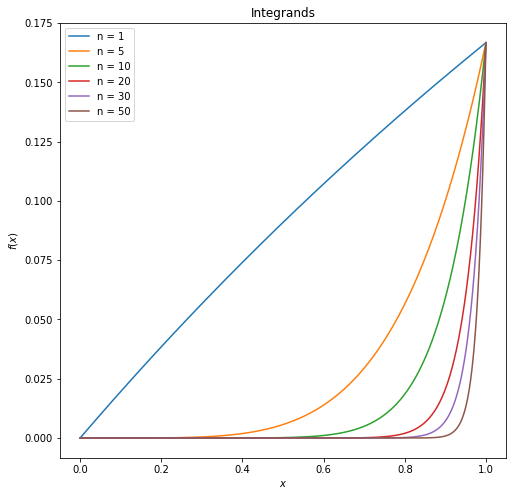

In [465]:
def integrand(x, n, a):
    return x**n/(x+a)
a = 5
ns = np.array([1, 5, 10, 20, 30, 50])
x = np.linspace(0, 1, 1000)

fig = plt.figure(figsize=(8,8))
for n in ns:
    plt.plot(x, integrand(x, n, a), label="n = "+str(n))
plt.ylabel("$f(x)$")    
plt.xlabel("$x$")
plt.title("Integrands")
plt.legend()
plt.show()

2. Write a computer program that reads the value of a, the starting values $n_0$ and $y_0$, and the final value $n_1$, and performs the iteration from $n_0$ to $n_1$ (either backward or forward, depending on whether $n_1 < n_0$ or $n_1 > n_0$). (7 points)

In [466]:
def forward(n, a, y, i):
    return (1/(n+1)-a*y[i])

# function for forward iteration

def backward(n, a, y, i):
    return 1/(n*a)-y[i]/a

# function for backward iteration

def iterate(a, n_0, n_1):    
    y_0 = np.log((1+a)/a)
    size, order = abs(n_0-n_1), n_0 < n_1
    step = (-1)**(order+1)
    ns, ys = np.arange(n_0, n_1+step, step), np.full(size+1, y_0)
    if order:
        for i in range(size):
            ys[i+1] = forward(ns[i], a, ys, i)
    else:
        for i in range(size):
            ys[i+1] = backward(ns[i], a, ys, i)
    return ns, ys

# function for iterating based on given a, n_0 and n_1

3. Experiment how this series behaves for iterations from $n_0 = 0$ to $n_1 = 30$ for $y_0 = \ln{\frac{1+a}{a}}$ with $a = 5$. Also try starting with $n_0 = 50$ and iterate back to $n_1 = 30$ for any starting value $y_0$. (6 points)

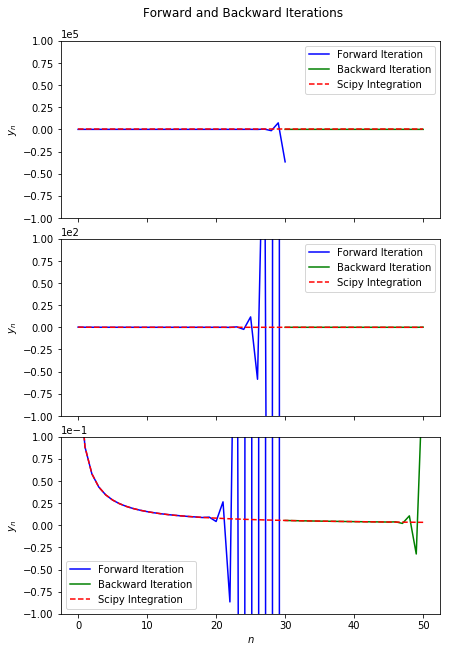

In [590]:
a = 5
nlims_f = 0, 30
nlims_b = 50, 30
ns_f, ys_f = iterate(a, *n_f)
ns_b, ys_b = iterate(a, *n_b)
ns_ref = np.arange(min(*n_f, *n_b), max(*n_f, *n_b)+1)
ys_ref = np.array([quad(integrand, 0, 1, args=(i,5))[0] for i in ns_ref])

# set and get values from functions

fig, axs = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(6,9)
fig.suptitle("Forward and Backward Iterations")
fig.tight_layout(rect=[0, 0, 1, 0.95])

for i in range(len(axs)):
    axs[i].plot(ns_f, ys_f, "b-", label="Forward Iteration")
    axs[i].plot(ns_b, ys_b, "g-", label="Backward Iteration")
    axs[i].plot(ns_ref, ys_ref, "r--", label="Scipy Integration" )
    axs[i].set_ylim(*(np.array([-1, 1])*10**(5-3*i)))
    axs[i].set_ylabel("$y_n$")
    axs[i].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    axs[i].legend()
plt.xlabel("$n$")
plt.show()

# plotting

As can be seen in the plots above, for the same final value $n_1=30$ the forwards iteraton is unstable and alternatingly diverges, while the backwards iteration is stable and converges to the correct value with each iteration. This is verified by the integral values that were calculated numerically by the scipy module.